In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_all = pd.read_csv('googletrends2.csv')
df = df_all[['Month','Python']]
df.head()

,Month,Python
0,2015-07,15
1,2015-08,16
2,2015-09,19
3,2015-10,19
4,2015-11,20


22:52:41 - cmdstanpy - INFO - Chain [1] start processing
22:52:43 - cmdstanpy - INFO - Chain [1] done processing


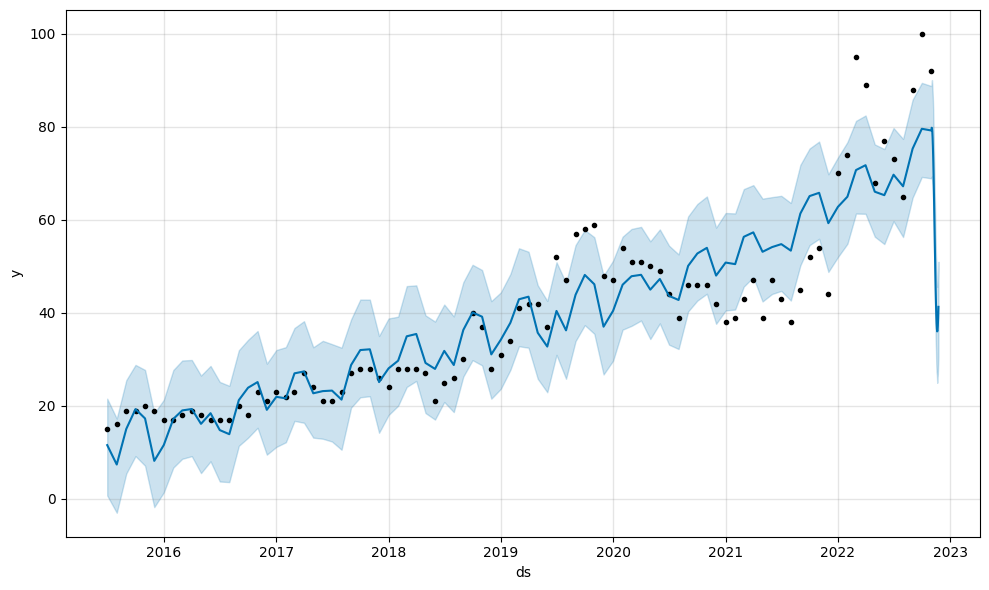

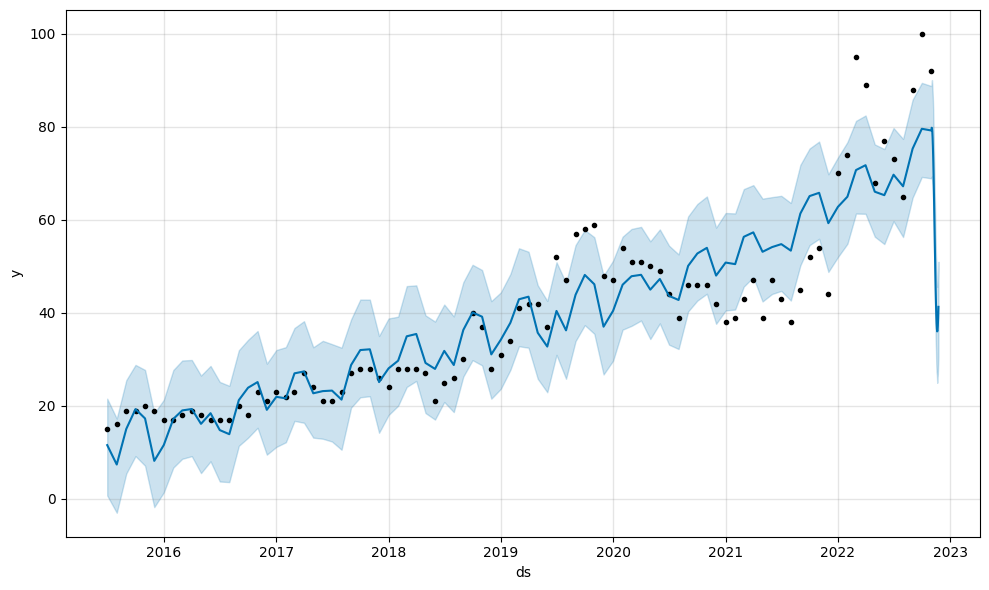

In [3]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

prophet_df = train.reset_index(drop=True)
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

# Plot
prophet_model.plot(forecast)

In [4]:
test_df = test.reset_index(drop=True)
test_df.columns = ['ds', 'y']  

forecast_test = forecast[-len(test):] 

mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 19.50731224387359
MSE: 562.2518094707036
RMSE: 23.711849558199876


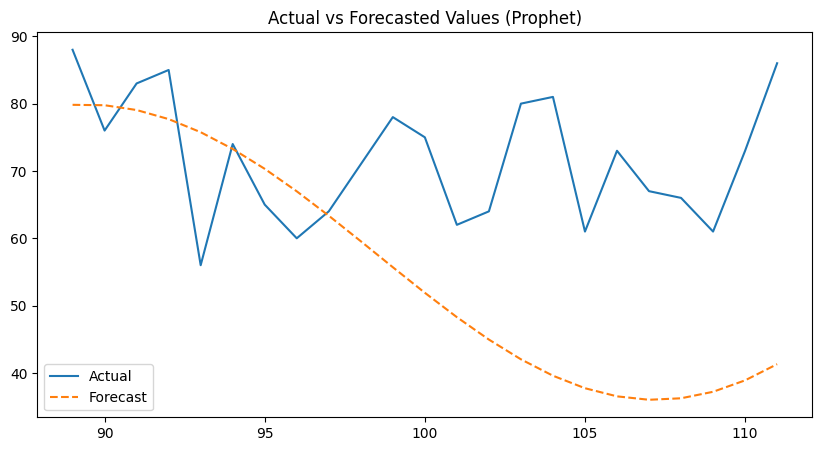

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_df['y'], label='Actual')
plt.plot(test.index, forecast_test['yhat'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values (Prophet)")
plt.show()

In [6]:
non_zero_columns = df_all.loc[:, (df_all != 0).any(axis=0)]
gtrend_languages = [col for col in non_zero_columns.columns if col != 'Month']  
num2 = len(gtrend_languages)

d = {}
d['language']=[]
d['mae'] = []
d['mse'] = []
d['rmse'] = []

for language in gtrend_languages:
    df1=df_all[['Month', language]]
    train_size = int(len(df1) * 0.8)
    train, test = df1[:train_size], df1[train_size:]

    prophet_df = train.reset_index(drop=True)
    prophet_df.columns = ['ds', 'y']

    prophet_model = Prophet()
    prophet_model.fit(prophet_df)

    future = prophet_model.make_future_dataframe(periods=len(test))
    forecast = prophet_model.predict(future)

    test_df = test.reset_index(drop=True)
    test_df.columns = ['ds', 'y']  

    forecast_test = forecast[-len(test):] 

    mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
    mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    d['language'].append(language)
    d['mae'].append(mae)
    d['mse'].append(mse)
    d['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(d)
df_res.to_csv('result_prophet.csv',index=False)


22:52:45 - cmdstanpy - INFO - Chain [1] start processing
22:52:46 - cmdstanpy - INFO - Chain [1] done processing
22:52:47 - cmdstanpy - INFO - Chain [1] start processing


MAE: 40.89153906142991
MSE: 1967.7242661449393
RMSE: 44.35903815621952


22:52:48 - cmdstanpy - INFO - Chain [1] done processing


MAE: 5.4041056390977475
MSE: 36.437151462566746
RMSE: 6.036319363864601


22:52:48 - cmdstanpy - INFO - Chain [1] start processing
22:52:49 - cmdstanpy - INFO - Chain [1] done processing
22:52:49 - cmdstanpy - INFO - Chain [1] start processing


MAE: 2.2291648817208625
MSE: 6.338353724654349
RMSE: 2.5176087314462405


22:52:50 - cmdstanpy - INFO - Chain [1] done processing
22:52:50 - cmdstanpy - INFO - Chain [1] start processing


MAE: 12.477610029055933
MSE: 174.61699873858953
RMSE: 13.214272539136974


22:52:51 - cmdstanpy - INFO - Chain [1] done processing
22:52:52 - cmdstanpy - INFO - Chain [1] start processing


MAE: 21.22210680982028
MSE: 641.9206593759815
RMSE: 25.336153207935524


22:52:53 - cmdstanpy - INFO - Chain [1] done processing
22:52:53 - cmdstanpy - INFO - Chain [1] start processing


MAE: 22.366056462513658
MSE: 582.5554805009818
RMSE: 24.136186121692504


22:52:54 - cmdstanpy - INFO - Chain [1] done processing
22:52:54 - cmdstanpy - INFO - Chain [1] start processing


MAE: 7.283035978039734
MSE: 58.856098526363624
RMSE: 7.671772841160225


22:52:55 - cmdstanpy - INFO - Chain [1] done processing
22:52:55 - cmdstanpy - INFO - Chain [1] start processing


MAE: 5.444998408875726
MSE: 43.21455095862766
RMSE: 6.5737775257934965


22:52:55 - cmdstanpy - INFO - Chain [1] done processing
22:52:55 - cmdstanpy - INFO - Chain [1] start processing


MAE: 6.340901706523251
MSE: 54.066829965103935
RMSE: 7.353015025491511


22:52:56 - cmdstanpy - INFO - Chain [1] done processing
22:52:56 - cmdstanpy - INFO - Chain [1] start processing


MAE: 19.50731224387359
MSE: 562.2518094707036
RMSE: 23.711849558199876


22:52:57 - cmdstanpy - INFO - Chain [1] done processing
22:52:57 - cmdstanpy - INFO - Chain [1] start processing


MAE: 5.965504646686861
MSE: 46.67181783704152
RMSE: 6.8316775273018795


22:52:58 - cmdstanpy - INFO - Chain [1] done processing
22:52:58 - cmdstanpy - INFO - Chain [1] start processing


MAE: 9.195397552987865
MSE: 97.46563747381136
RMSE: 9.872468661576564


22:52:59 - cmdstanpy - INFO - Chain [1] done processing
22:52:59 - cmdstanpy - INFO - Chain [1] start processing


MAE: 38.64904919915819
MSE: 1684.384448937837
RMSE: 41.041253013740175


22:53:00 - cmdstanpy - INFO - Chain [1] done processing
22:53:00 - cmdstanpy - INFO - Chain [1] start processing


MAE: 0.16872712210517324
MSE: 0.037366033240184775
RMSE: 0.19330295714288692


22:53:01 - cmdstanpy - INFO - Chain [1] done processing
22:53:01 - cmdstanpy - INFO - Chain [1] start processing


MAE: 5.05628880950577
MSE: 45.59177230370678
RMSE: 6.752167970637785


22:53:02 - cmdstanpy - INFO - Chain [1] done processing
22:53:02 - cmdstanpy - INFO - Chain [1] start processing


MAE: 0.3814010636973773
MSE: 0.21529305846490523
RMSE: 0.4639968302315278


22:53:03 - cmdstanpy - INFO - Chain [1] done processing
22:53:03 - cmdstanpy - INFO - Chain [1] start processing


MAE: 131.55980794298506
MSE: 20590.137720724713
RMSE: 143.4926399531513


22:53:03 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2.562449196549259
MSE: 8.204855927171417
RMSE: 2.8644119688291028


22:53:04 - cmdstanpy - INFO - Chain [1] start processing
22:53:05 - cmdstanpy - INFO - Chain [1] done processing
22:53:05 - cmdstanpy - INFO - Chain [1] start processing


MAE: 3.1656848818550096
MSE: 13.153474251570737
RMSE: 3.626771877520109


22:53:06 - cmdstanpy - INFO - Chain [1] done processing
22:53:06 - cmdstanpy - INFO - Chain [1] start processing


MAE: 24.922756891089975
MSE: 739.7934428821576
RMSE: 27.19914415716343


22:53:06 - cmdstanpy - INFO - Chain [1] done processing


MAE: 13.298153891096804
MSE: 200.83851309031334
RMSE: 14.171750530203152


22:53:07 - cmdstanpy - INFO - Chain [1] start processing
22:53:07 - cmdstanpy - INFO - Chain [1] done processing
22:53:07 - cmdstanpy - INFO - Chain [1] start processing


MAE: 4.330907976717497
MSE: 31.83311672814975
RMSE: 5.642084431143312


22:53:08 - cmdstanpy - INFO - Chain [1] done processing
22:53:08 - cmdstanpy - INFO - Chain [1] start processing


MAE: 7.200757728701045
MSE: 65.15181568123612
RMSE: 8.071667465972327


22:53:09 - cmdstanpy - INFO - Chain [1] done processing
22:53:09 - cmdstanpy - INFO - Chain [1] start processing


MAE: 1.7560172435808055
MSE: 3.9216267913418195
RMSE: 1.9803097715614644


22:53:10 - cmdstanpy - INFO - Chain [1] done processing


MAE: 99.58144030524713
MSE: 12409.831569011276
RMSE: 111.39942355780516


22:53:11 - cmdstanpy - INFO - Chain [1] start processing
22:53:12 - cmdstanpy - INFO - Chain [1] done processing
22:53:12 - cmdstanpy - INFO - Chain [1] start processing


MAE: 22.511024415924073
MSE: 900.5088923558926
RMSE: 30.008480340661915


22:53:13 - cmdstanpy - INFO - Chain [1] done processing


MAE: 18.959677952960934
MSE: 427.859742606182
RMSE: 20.684770789307336


22:53:14 - cmdstanpy - INFO - Chain [1] start processing
22:53:15 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1.6077399159991612
MSE: 3.3937910737569217
RMSE: 1.8422244905974194


22:53:16 - cmdstanpy - INFO - Chain [1] start processing
22:53:16 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.20710577507944167
MSE: 0.08434154629899542
RMSE: 0.2904161605334583


22:53:16 - cmdstanpy - INFO - Chain [1] start processing
22:53:17 - cmdstanpy - INFO - Chain [1] done processing


MAE: 6.583330752514446
MSE: 56.10763416862289
RMSE: 7.490502931621006


22:53:17 - cmdstanpy - INFO - Chain [1] start processing
22:53:18 - cmdstanpy - INFO - Chain [1] done processing


MAE: 9.400931040140504
MSE: 139.55312204929575
RMSE: 11.813260432636527


22:53:19 - cmdstanpy - INFO - Chain [1] start processing
22:53:20 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.21599361543550644
MSE: 0.059274137238195024
RMSE: 0.24346280462977302


22:53:20 - cmdstanpy - INFO - Chain [1] start processing
22:53:21 - cmdstanpy - INFO - Chain [1] done processing


MAE: 31.463714575657857
MSE: 1081.1069483789738
RMSE: 32.88019082029442


22:53:21 - cmdstanpy - INFO - Chain [1] start processing
22:53:22 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1.358076091315077
MSE: 2.568042495270215
RMSE: 1.6025113089367622


22:53:23 - cmdstanpy - INFO - Chain [1] start processing
22:53:23 - cmdstanpy - INFO - Chain [1] done processing


MAE: 23.41427824647706
MSE: 801.4210015802431
RMSE: 28.309380098833728


22:53:24 - cmdstanpy - INFO - Chain [1] start processing
22:53:25 - cmdstanpy - INFO - Chain [1] done processing


MAE: 13.731409521305745
MSE: 228.84797701123415
RMSE: 15.127722135577258


22:53:25 - cmdstanpy - INFO - Chain [1] start processing
22:53:26 - cmdstanpy - INFO - Chain [1] done processing


MAE: 11.790034126783173
MSE: 190.46721306507436
RMSE: 13.800985945398045


22:53:27 - cmdstanpy - INFO - Chain [1] start processing
22:53:28 - cmdstanpy - INFO - Chain [1] done processing


MAE: 7.099640378998038
MSE: 74.68763709934287
RMSE: 8.642200940694615


22:53:28 - cmdstanpy - INFO - Chain [1] start processing
22:53:29 - cmdstanpy - INFO - Chain [1] done processing


MAE: 5.28886236276889
MSE: 42.29061808145716
RMSE: 6.503123717219069


22:53:30 - cmdstanpy - INFO - Chain [1] start processing
22:53:31 - cmdstanpy - INFO - Chain [1] done processing


MAE: 17.57107360771619
MSE: 466.6760997806236
RMSE: 21.602687327752157


22:53:31 - cmdstanpy - INFO - Chain [1] start processing
22:53:32 - cmdstanpy - INFO - Chain [1] done processing


MAE: 3.6133340863740138
MSE: 15.125087309472255
RMSE: 3.889098521440702


22:53:32 - cmdstanpy - INFO - Chain [1] start processing
22:53:34 - cmdstanpy - INFO - Chain [1] done processing
22:53:34 - cmdstanpy - INFO - Chain [1] start processing


MAE: 2.4911107485839707
MSE: 7.144394549594289
RMSE: 2.6729000261128903


22:53:34 - cmdstanpy - INFO - Chain [1] done processing
22:53:35 - cmdstanpy - INFO - Chain [1] start processing


MAE: 62.23234317895751
MSE: 4381.41851928903
RMSE: 66.19228443926852


22:53:35 - cmdstanpy - INFO - Chain [1] done processing


MAE: 13.923118053324206
MSE: 260.70347847654136
RMSE: 16.14631470263544


22:53:36 - cmdstanpy - INFO - Chain [1] start processing
22:53:36 - cmdstanpy - INFO - Chain [1] done processing
22:53:36 - cmdstanpy - INFO - Chain [1] start processing


MAE: 48.18354518781123
MSE: 2728.626173742216
RMSE: 52.23625344281705


22:53:37 - cmdstanpy - INFO - Chain [1] done processing
22:53:37 - cmdstanpy - INFO - Chain [1] start processing


MAE: 17.281951114637877
MSE: 546.524497559166
RMSE: 23.377863408771255


22:53:37 - cmdstanpy - INFO - Chain [1] done processing
22:53:37 - cmdstanpy - INFO - Chain [1] start processing


MAE: 20.03023916552224
MSE: 436.62907421263384
RMSE: 20.895671183588092


22:53:38 - cmdstanpy - INFO - Chain [1] done processing
22:53:38 - cmdstanpy - INFO - Chain [1] start processing


MAE: 3.218398191344485
MSE: 15.200736034796728
RMSE: 3.8988121312518675


22:53:38 - cmdstanpy - INFO - Chain [1] done processing
22:53:38 - cmdstanpy - INFO - Chain [1] start processing


MAE: 37.49730527646415
MSE: 1571.0678428750296
RMSE: 39.63669818331277


22:53:39 - cmdstanpy - INFO - Chain [1] done processing
22:53:39 - cmdstanpy - INFO - Chain [1] start processing


MAE: 12.013273301840652
MSE: 175.7424357883761
RMSE: 13.256788290848432


22:53:40 - cmdstanpy - INFO - Chain [1] done processing
22:53:40 - cmdstanpy - INFO - Chain [1] start processing


MAE: 4.276094739491473
MSE: 37.527897513660186
RMSE: 6.126001755930224


22:53:41 - cmdstanpy - INFO - Chain [1] done processing
22:53:41 - cmdstanpy - INFO - Chain [1] start processing


MAE: 6.8680439054952025
MSE: 66.68106343579814
RMSE: 8.165847380143603


22:53:42 - cmdstanpy - INFO - Chain [1] done processing
22:53:42 - cmdstanpy - INFO - Chain [1] start processing


MAE: 24.773301243829728
MSE: 868.5505420432734
RMSE: 29.471181551530528


22:53:42 - cmdstanpy - INFO - Chain [1] done processing
22:53:43 - cmdstanpy - INFO - Chain [1] start processing


MAE: 5.513579063315094
MSE: 41.540181020116634
RMSE: 6.445167260833239


22:53:43 - cmdstanpy - INFO - Chain [1] done processing


MAE: 48.842691649041555
MSE: 2809.48228701707
RMSE: 53.0045496822402
